In [ ]:
# %pip install tensorflow

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

import os

import numpy as np

from collections import Counter

import glob

# First iteration of the model:

[2560, 1792, 724]


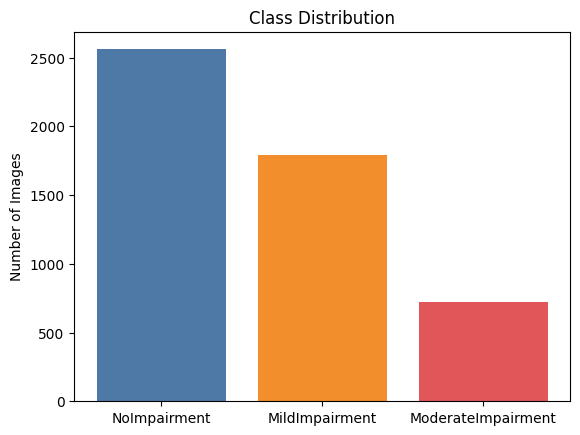

In [10]:
#Sets the base path
basepath = '../data/raw'

# Our three classes
classes = ["NoImpairment", "MildImpairment", "ModerateImpairment"]
counts = []

# Loops through the classes list and creates the full path.
# Then outputs a list of all the items in the folder into 'files'.
# len() then counts the length of files, and the value is added to the counts list.

for class_name in classes:
    full_path = os.path.join(basepath, class_name)
    files = glob.glob(os.path.join(full_path, "*.jpg"))
    counts.append(len(files))


# Creates a barchart
bar_plot = plt.bar(classes, counts, color=['#4e79a7', '#f28e2b', '#e15759'])
plt.title ('Class Distribution')
plt.ylabel ('Number of Images')
plt.show
print (counts)


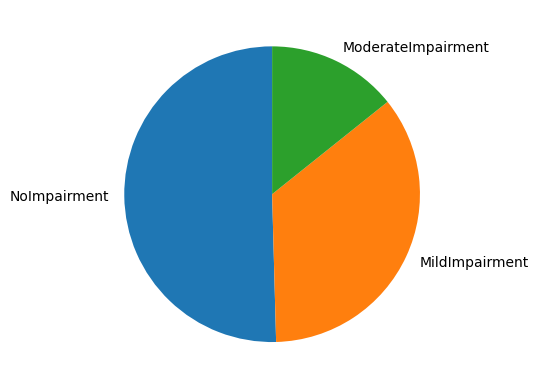

In [8]:
pie_plot = plt.pie(counts, labels = classes, startangle=90)
plt.show()

In [29]:
class_names = ['MildImpairment', 'ModerateImpairment', 'NoImpairment']

train_ds = keras.utils.image_dataset_from_directory(basepath, subset = "training", labels='inferred', validation_split=0.2, seed = 2614)

test_val_data = keras.utils.image_dataset_from_directory(basepath, labels='inferred', subset = "validation", validation_split=0.2, seed = 2614)

print(train_ds.class_names)


Found 5076 files belonging to 3 classes.
Using 4061 files for training.
Found 5076 files belonging to 3 classes.
Using 1015 files for validation.
['MildImpairment', 'ModerateImpairment', 'NoImpairment']


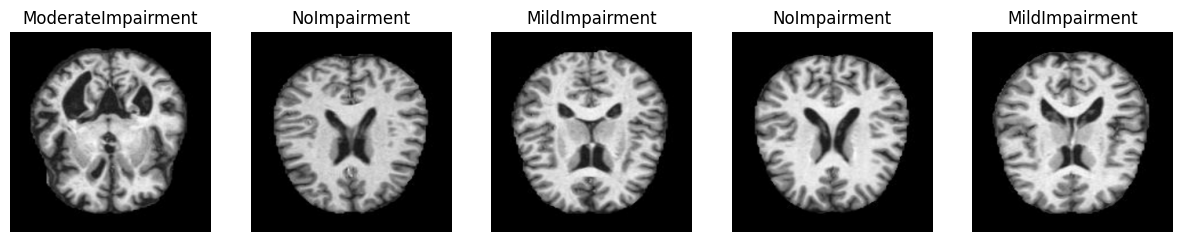

In [12]:
# Checking that the training data is shuffled.
plt.figure(figsize=(15, 5))

# Take 1 batch (which contains 32 images and 32 labels)
# Loops through the first 5 images and labels.
for images, labels in train_ds.take(1):
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        # Convert tensor to standard image format.
        plt.imshow(images[i].numpy().astype("uint8"))
        # Look up the class name using the label index
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [30]:
val_batches = (len(test_val_data))
print (val_batches)
val_ds = test_val_data.take(16)
test_ds = test_val_data.skip(16)

32


In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense

model = models.Sequential([
    Input(shape=(256, 256, 3)),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling2D (2,2),
    Flatten(),
    Dropout(rate = 0.1),
    Dense(units = 3, activation = 'softmax')
])

In [15]:
#Stochastic gradient descent optimisation algorithm
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate = 0.003),
              loss = "sparse_categorical_crossentropy",
              metrics =['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 516128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 516128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │     1,548,387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,549,283 (5.91 MB)

 Trainable params: 1,549,283 (5.91 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(
    monitor = 'val_loss',
    patience = 4,
    restore_best_weights = True
)

In [17]:
model_training = model.fit(train_ds, validation_data = val_ds,
batch_size=32,
epochs=20, shuffle=True,
callbacks = [early_stopping_callback])


Epoch 1/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 27s 202ms/step - accuracy: 0.5004 - loss: 1121.0431 - val_accuracy: 0.5977 - val_loss: 0.8598
Epoch 2/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 23s 181ms/step - accuracy: 0.6065 - loss: 0.8499 - val_accuracy: 0.5801 - val_loss: 0.8832
Epoch 3/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 23s 181ms/step - accuracy: 0.6599 - loss: 0.7601 - val_accuracy: 0.5938 - val_loss: 0.8696
Epoch 4/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 23s 181ms/step - accuracy: 0.7318 - loss: 0.6286 - val_accuracy: 0.6660 - val_loss: 0.7523
Epoch 5/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 23s 184ms/step - accuracy: 0.7446 - loss: 0.5855 - val_accuracy: 0.6113 - val_loss: 0.8424
Epoch 6/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 23s 184ms/step - accuracy: 0.7759 - loss: 0.5211 - val_accuracy: 0.6445 - val_loss: 0.8135
Epoch 7/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 24s 186ms/step - accuracy: 0.8104 - loss: 0.4666 - val_accuracy: 0.6348 - val_loss: 0.9060
Epoch 8/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 23s 182ms/step - accuracy: 0.8439 - loss

In [120]:
loss, accuracy = model.evaluate(test_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6322 - loss: 0.8036


<function matplotlib.pyplot.show(close=None, block=None)>

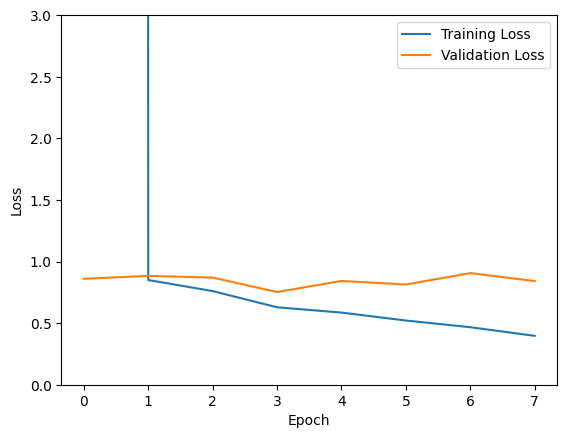

In [69]:
plt.plot (model_training.epoch, model_training.history["loss"], label = 'Training Loss')
plt.plot (model_training.epoch, model_training.history["val_loss"], label = 'Validation Loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.ylim (0,3)
plt.legend(loc = 'upper right')
plt.show

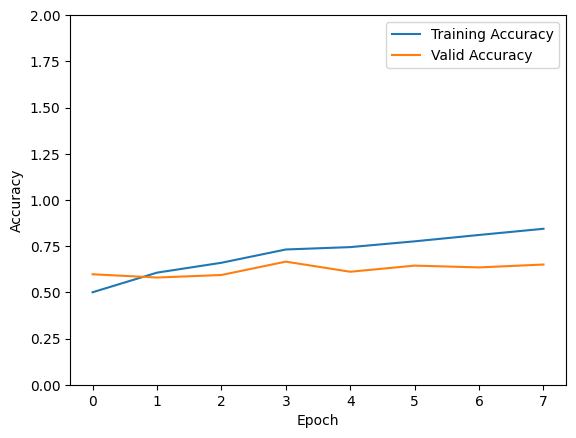

In [70]:
plt.plot(model_training.history['accuracy'], label = 'Training Accuracy')
plt.plot(model_training.history['val_accuracy'], label = 'Valid Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.ylim (0,2)
plt.legend()

In [121]:
y_prob = model.predict(test_ds)
print(train_ds.class_names)
print(y_prob[0:10])
print(y_prob.shape)




16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
['MildImpairment', 'ModerateImpairment', 'NoImpairment']
[[0.11915576 0.01532977 0.8655145 ]
 [0.8760578  0.01753434 0.10640791]
 [0.15192196 0.13086368 0.71721435]
 [0.8124945  0.01881618 0.1686893 ]
 [0.02460229 0.01962278 0.955775  ]
 [0.01203847 0.03919962 0.9487619 ]
 [0.10024104 0.12148981 0.7782692 ]
 [0.13945915 0.01587264 0.8446682 ]
 [0.09471914 0.01171816 0.89356273]
 [0.00985857 0.01525841 0.97488314]]
(503, 3)


In [122]:
y_pred = np.argmax(y_prob, axis = 1)
print (y_pred)

[2 0 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 1 2 2 2 0 2 0 2 2 2 0 2 2 2
 2 2 2 0 2 0 2 0 2 0 2 2 2 0 2 0 1 1 2 0 2 2 2 2 2 2 1 2 2 0 0 2 2 2 2 0 2
 0 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 2 2 0 1 1 1 2 1 1 2 0 2 1 0 0 2 0 2 0 2 2
 0 0 2 0 0 2 0 2 2 0 0 0 2 2 0 2 2 1 0 1 0 0 2 2 0 1 2 2 0 2 0 0 2 0 1 2 0
 0 2 2 2 2 0 1 2 0 0 2 2 0 2 0 1 2 2 2 0 0 2 0 2 2 2 2 2 2 2 0 2 0 2 1 2 2
 0 2 2 2 2 0 0 2 1 2 2 0 2 0 0 2 2 1 0 2 2 2 2 2 2 0 2 0 0 2 2 2 2 2 2 0 0
 2 2 2 0 2 0 2 0 1 0 2 2 1 2 0 0 2 2 2 0 2 2 0 0 2 2 0 0 0 0 0 2 0 0 2 0 0
 2 0 0 2 2 2 0 2 2 2 2 2 1 0 2 2 2 2 2 0 0 0 0 0 2 2 2 2 2 2 2 0 2 1 0 0 2
 0 0 0 0 2 0 2 2 0 0 1 0 0 2 2 2 2 2 0 2 1 2 2 2 0 2 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2 0 2 2 0 0 0 2 0 2 0 2 2
 2 2 0 1 0 0 2 2 1 2 2 0 0 0 1 0 2 0 2 2 2 2 2 2 1 0 2 2 0 1 0 2 2 0 2 2 0
 0 1 2 0 2 0 2 2 1 2 2 0 0 2 2 2 2 2 0 1 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 0 2
 0 0 2 2 2 0 2 0 2 0 2 2 2 2 2 1 2 2 2 0 2 1 1 2 2 0 2 0 0 2 1 2 2 2 0 2 2
 0 2 2 2 2 2 2 2 2 2 1 0 

In [123]:
# %pip install pandas
import pandas as pd
epochs = model_training.epoch
hist = pd.DataFrame(model_training.history)

hist

,accuracy,loss,val_accuracy,val_loss
0,0.500369,1121.043091,0.597656,0.859805
1,0.606501,0.849948,0.580078,0.883220
2,0.659936,0.760133,0.593750,0.869626
3,0.731839,0.628554,0.666016,0.752349
4,0.744644,0.585538,0.611328,0.842384
5,0.775917,0.521078,0.644531,0.813450
6,0.810392,0.466645,0.634766,0.905952
7,0.843881,0.396781,0.650391,0.841353


In [124]:
# 1. Get the true labels from the test set
y_true = []
for images, labels in test_ds:
    y_true.extend(labels.numpy())

y_true = np.array(y_true)
print("True Labels Shape:", y_true.shape)
print("Predicted Labels Shape:", y_pred.shape)

True Labels Shape: (503,)
Predicted Labels Shape: (503,)


In [125]:
# %pip install scikit-learn
from sklearn.metrics import classification_report, confusion_matrix

# Print the metrics table
print(classification_report(y_true, y_pred, target_names=class_names))

                    precision    recall  f1-score   support

    MildImpairment       0.35      0.31      0.33       180
ModerateImpairment       0.08      0.04      0.06        67
      NoImpairment       0.51      0.61      0.56       256

          accuracy                           0.43       503
         macro avg       0.31      0.32      0.31       503
      weighted avg       0.40      0.43      0.41       503



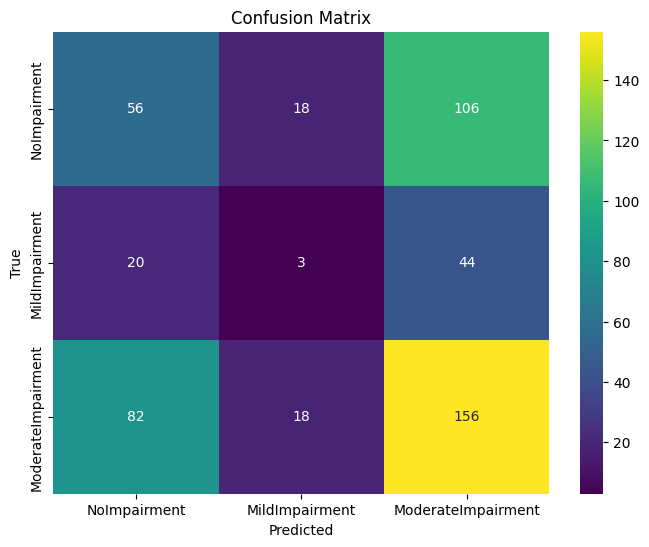

In [126]:
# %pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot it using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [127]:
# Final metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

print(classification_report(y_true, y_pred, target_names=classes))

Test Accuracy: 0.6322
Test Loss: 0.8036
                    precision    recall  f1-score   support

      NoImpairment       0.35      0.31      0.33       180
    MildImpairment       0.08      0.04      0.06        67
ModerateImpairment       0.51      0.61      0.56       256

          accuracy                           0.43       503
         macro avg       0.31      0.32      0.31       503
      weighted avg       0.40      0.43      0.41       503



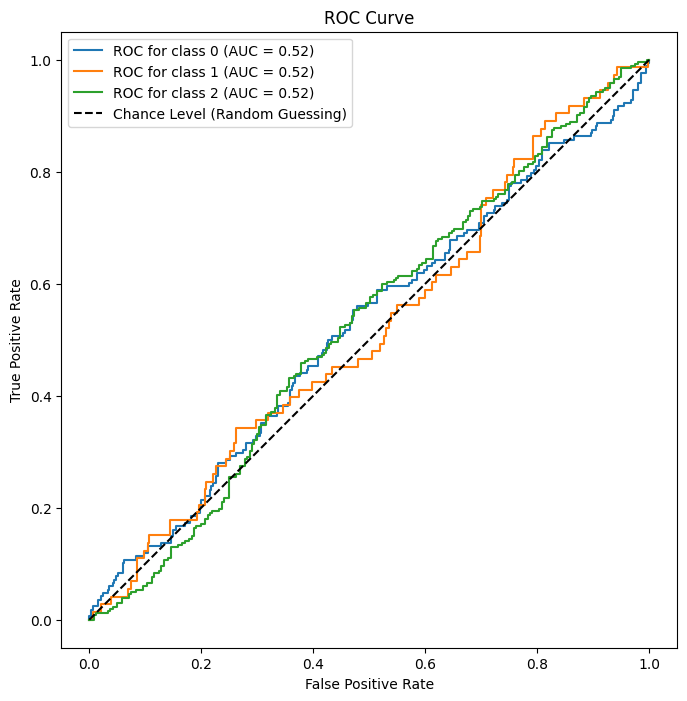

In [42]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fig, ax = plt.subplots(figsize=(8,8))

for class_id in range(3):
    binary_labels = (y_true == class_id)
    class_probabilities = y_prob[:, class_id]
    RocCurveDisplay.from_predictions(
        binary_labels,
        class_probabilities,   
        name=f"ROC for class {class_id}",
        ax=ax
    )

plt.plot([0,1], [0,1], "k--", label = "Random Classifier (Random Guessing)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Second iteration of the model
#### The first model shows evidence of severe overfitting, so we do three things to address it:
- Data Augmentation
- Add multiple layers to the CNN 
- Tune the learning rate

In [49]:
model_v2 = models.Sequential([
    Input(shape=(256, 256, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.Rescaling(scale=1./255),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling2D (2,2),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling2D (2,2),
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling2D (2,2),
    Flatten(),
    Dropout(rate = 0.1),
    Dense(units = 3, activation = 'softmax')
])

In [50]:
model_v2.compile(optimizer = Adam(learning_rate = 0.001),
              loss = "sparse_categorical_crossentropy",
              metrics =['accuracy'])
model_v2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │       345,603 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 438,851 (1.67 MB)

 Trainable params: 438,851 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
early_stopping_callback = EarlyStopping(
    monitor = 'val_loss',
    patience = 4,
    restore_best_weights = True
)

In [52]:
model_training_v2 = model_v2.fit(train_ds, validation_data = val_ds,
batch_size=32,
epochs=50, shuffle=True,
callbacks = [early_stopping_callback])

Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 67s 516ms/step - accuracy: 0.4817 - loss: 1.0286 - val_accuracy: 0.5547 - val_loss: 0.9079
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 64s 505ms/step - accuracy: 0.5159 - loss: 0.9537 - val_accuracy: 0.5684 - val_loss: 0.8525
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 64s 507ms/step - accuracy: 0.5474 - loss: 0.9043 - val_accuracy: 0.5723 - val_loss: 0.8386
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 63s 499ms/step - accuracy: 0.5481 - loss: 0.8920 - val_accuracy: 0.5742 - val_loss: 0.8513
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 73s 579ms/step - accuracy: 0.5627 - loss: 0.8781 - val_accuracy: 0.5566 - val_loss: 0.8697
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 79s 625ms/step - accuracy: 0.5654 - loss: 0.8786 - val_accuracy: 0.5801 - val_loss: 0.8807
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 79s 621ms/step - accuracy: 0.5686 - loss: 0.8712 - val_accuracy: 0.5957 - val_loss: 0.8369
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 79s 625ms/step - accuracy: 0.5639 - loss: 0

In [128]:
epoch_v2 = model_training_v2.epoch
history_v2 = model_training_v2.history

In [131]:
loss_v2, accuracy_v2 = model_v2.evaluate(test_ds)
print (f"The loss was {loss_v2}")
print (f"The accuracy was {accuracy_v2}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.5964 - loss: 0.8063
The loss was 0.806298553943634
The accuracy was 0.596421480178833


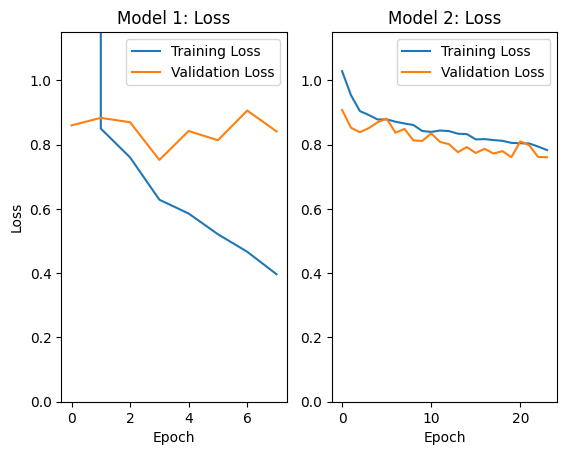

In [107]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot (model_training.epoch, model_training.history["loss"], label = 'Training Loss')
ax1.plot (model_training.epoch, model_training.history["val_loss"], label = 'Validation Loss')
ax1.set_title("Model 1: Loss")
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylim(0,1.15)
ax1.legend()

ax2.plot (model_training_v2.epoch, model_training_v2.history["loss"], label = 'Training Loss')
ax2.plot (model_training_v2.epoch, model_training_v2.history["val_loss"], label = 'Validation Loss')
ax2.legend(loc = 'upper right')
ax2.set_title("Model 2: Loss")
ax2.set_ylim(0,1.15)
ax2.set_xlabel("Epoch")

plt.show()

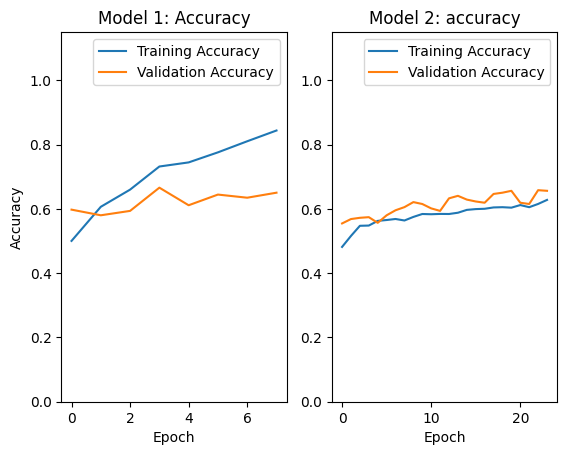

In [108]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot (model_training.epoch, model_training.history["accuracy"], label = 'Training Accuracy')
ax1.plot (model_training.epoch, model_training.history["val_accuracy"], label = 'Validation Accuracy')
ax1.set_title("Model 1: Accuracy")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epoch")
ax1.set_ylim(0,1.15)
ax1.legend()

ax2.plot (model_training_v2.epoch, model_training_v2.history["accuracy"], label = 'Training Accuracy')
ax2.plot (model_training_v2.epoch, model_training_v2.history["val_accuracy"], label = 'Validation Accuracy')
ax2.legend()
ax2.set_title("Model 2: accuracy")
ax2.set_ylim(0,1.15)
ax2.set_xlabel("Epoch")

plt.show()

In [132]:
y_prob_v2 = model_v2.predict(test_ds)
print(train_ds.class_names)
print(y_prob_v2[0:10])
print(y_prob_v2.shape)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step
['MildImpairment', 'ModerateImpairment', 'NoImpairment']
[[0.2030536  0.00376059 0.7931859 ]
 [0.22195116 0.17827012 0.5997787 ]
 [0.25870714 0.30871084 0.43258202]
 [0.15308158 0.01663851 0.8302799 ]
 [0.21851271 0.2339875  0.5474998 ]
 [0.5280743  0.10287771 0.36904797]
 [0.25664562 0.16007575 0.5832787 ]
 [0.2913093  0.0686875  0.6400032 ]
 [0.61315745 0.11967946 0.26716313]
 [0.228467   0.03782253 0.73371047]]
(503, 3)


In [133]:
y_pred_v2 = np.argmax(y_prob_v2, axis = 1)
print (y_pred_v2)

[2 2 2 2 2 0 2 2 0 2 2 2 1 2 1 2 0 0 2 2 2 1 1 1 0 2 2 2 1 2 2 2 2 2 2 1 2
 2 0 0 0 2 2 2 2 1 1 2 2 2 2 1 0 2 2 0 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 2
 2 1 2 1 0 2 1 1 2 2 1 2 1 0 0 2 0 2 2 2 2 2 0 1 2 0 2 2 2 2 2 0 0 1 2 2 0
 1 2 0 0 0 2 2 0 0 1 0 2 1 2 0 0 1 0 1 2 0 2 0 2 1 1 0 2 2 0 1 1 1 2 2 2 2
 2 1 0 2 2 2 2 1 0 1 1 1 1 0 2 0 2 2 1 2 2 0 2 2 0 0 2 2 0 1 0 0 0 0 0 0 2
 2 2 2 2 2 0 1 2 2 2 2 2 2 2 0 0 0 2 2 2 1 2 0 0 1 2 2 2 2 2 0 2 1 2 2 2 2
 1 2 2 2 1 1 0 2 0 2 0 2 2 2 2 2 2 1 0 1 2 2 1 2 2 0 0 2 2 2 0 2 2 2 2 0 2
 2 0 0 0 2 0 2 2 2 2 0 1 1 2 2 2 2 2 2 2 2 0 1 2 1 2 0 2 2 2 2 0 2 0 1 0 2
 2 2 2 2 2 1 2 2 2 0 2 2 1 2 1 2 2 2 2 0 1 2 2 0 0 2 2 1 2 0 2 1 0 0 1 2 2
 1 0 1 0 0 2 1 0 1 2 2 2 0 1 2 0 0 2 2 1 1 2 2 1 0 1 2 0 1 1 2 2 2 2 2 2 2
 0 1 2 2 0 1 0 2 2 2 0 2 2 1 0 1 1 1 1 1 1 1 2 2 0 1 2 2 2 0 2 1 2 2 2 2 0
 0 2 0 1 1 2 1 1 2 2 0 2 2 2 2 0 2 1 2 0 2 0 2 0 1 1 2 0 2 0 2 2 0 2 0 1 1
 2 2 0 2 1 2 0 2 2 1 2 2 0 1 1 2 1 2 2 2 2 2 2 2 0 1 2 2 1 2 2 1 1 2 0 0 2
 2 2 1 0 1 2 2 2 2 2 1 2 

In [134]:
y_true_v2 = []
for images, labels in test_ds:
    y_true_v2.extend(labels.numpy())

y_true_v2 = np.array(y_true_v2)
print("True Labels Shape:", y_true_v2.shape)
print("Predicted Labels Shape:", y_pred_v2.shape)

True Labels Shape: (503,)
Predicted Labels Shape: (503,)


In [135]:
print(classification_report(y_true_v2, y_pred_v2, target_names=class_names))

                    precision    recall  f1-score   support

    MildImpairment       0.40      0.28      0.33       174
ModerateImpairment       0.16      0.25      0.20        69
      NoImpairment       0.55      0.59      0.57       260

          accuracy                           0.44       503
         macro avg       0.37      0.37      0.36       503
      weighted avg       0.45      0.44      0.44       503



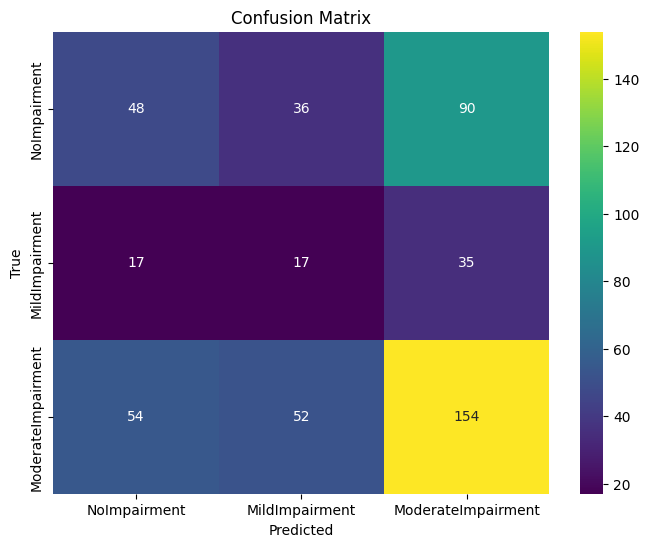

In [136]:
# Create the confusion matrix
cm = confusion_matrix(y_true_v2, y_pred_v2)

# Plot it using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [137]:
# Final metrics
print(f"Test Accuracy: {accuracy_v2:.4f}")
print(f"Test Loss: {loss_v2:.4f}")

print(classification_report(y_true_v2, y_pred_v2, target_names=classes))

Test Accuracy: 0.5964
Test Loss: 0.8063
                    precision    recall  f1-score   support

      NoImpairment       0.40      0.28      0.33       174
    MildImpairment       0.16      0.25      0.20        69
ModerateImpairment       0.55      0.59      0.57       260

          accuracy                           0.44       503
         macro avg       0.37      0.37      0.36       503
      weighted avg       0.45      0.44      0.44       503

